## Libraries

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import generate_white_illussion
import generate_white_illussion2
import generate_Chevreul
import generate_grating_induction2
import generate_brightnessContrast
import generate_Todorovic
import generate_checkerboard
import generateCaffeWall
import cv2
import h5py

In [57]:
def generateWhite(outputSize, height, spatialFreq, colors,firstTarget,secondTarget):
    #Parameters
    #outputSize = 128 # Size of the output image
    #height = 0.1 # Height of the target
    #spatialFreq = 0.05 #size of the inducer patter with respect to image size
    
    # Target position
    heightPos = round(outputSize/2)
#    heightPix = round((height*outputSize)/2)
    
    # Colors
    lightInducerR = colors[0,0]
    lightInducerG = colors[0,1]
    lightInducerB = colors[0,2]
    
    darkInducerR = colors[1,0]
    darkInducerG = colors[1,1]
    darkInducerB = colors[1,2]
    
    targetR = colors[2,0]
    targetG = colors[2,1]
    targetB = colors[2,2]
    
    
    #firstTarget = 0.23    
    #secondTarget = 0.6
    
    
    #firstTarget = 0.3    
    #secondTarget = 0.7
    
    
    
    if(spatialFreq==0.09):
        
        firstTarget = 0.1
    
    
    
    
    image = np.ones((outputSize,outputSize,3))
    numBars = round(outputSize/(outputSize*spatialFreq))
    sizeBar = round(outputSize*spatialFreq)
    heightPix = sizeBar*2
    if(numBars*sizeBar<outputSize-20):
        numBars += 28
        firstTarget = 0.28
        secondTarget = 0.7
        
    
    
    # Counters and flags
    cont = 0;
    flagWhite = True;
    flagBlack = True;
    
    for i in range(numBars+2):
       
        if((i%2) == 0):
        
            if(sizeBar*i+sizeBar<=outputSize):
            
                image[:, sizeBar*i:sizeBar*i+sizeBar,0] = lightInducerR
                image[:, sizeBar*i:sizeBar*i+sizeBar,1] = lightInducerG
                image[:, sizeBar*i:sizeBar*i+sizeBar,2] = lightInducerB
            
            else:
                image[:, sizeBar*i:outputSize,0] = lightInducerR
                image[:, sizeBar*i:outputSize,1] = lightInducerG
                image[:, sizeBar*i:outputSize,2] = lightInducerB
    
            
            if(cont>=firstTarget*numBars and flagWhite):
                image[heightPos-heightPix:heightPos+heightPix,sizeBar*i:sizeBar*i+sizeBar,0]=targetR
                image[heightPos-heightPix:heightPos+heightPix,sizeBar*i:sizeBar*i+sizeBar,1]=targetG
                image[heightPos-heightPix:heightPos+heightPix,sizeBar*i:sizeBar*i+sizeBar,2]=targetB
                flagWhite = False            
            
        else:
            if(sizeBar*i+sizeBar<=outputSize):
            
                image[:, sizeBar*i:sizeBar*i+sizeBar,0] = darkInducerR;
                image[:, sizeBar*i:sizeBar*i+sizeBar,1] = darkInducerG;
                image[:, sizeBar*i:sizeBar*i+sizeBar,2] = darkInducerB;
                
            else:
                image[:, sizeBar*i:outputSize] = darkInducerR;
                image[:, sizeBar*i:outputSize] = darkInducerG;
                image[:, sizeBar*i:outputSize] = darkInducerB;
                
            
            
            if(cont>=secondTarget*numBars and flagBlack and cont<0.9*numBars):
                image[heightPos-heightPix:heightPos+heightPix,sizeBar*i:sizeBar*i+sizeBar,0]=targetR
                image[heightPos-heightPix:heightPos+heightPix,sizeBar*i:sizeBar*i+sizeBar,1]=targetG
                image[heightPos-heightPix:heightPos+heightPix,sizeBar*i:sizeBar*i+sizeBar,2]=targetB
                flagBlack = False            
                    
            
      
        
        cont += 1;    
        
    return image
    


## Whites illusion

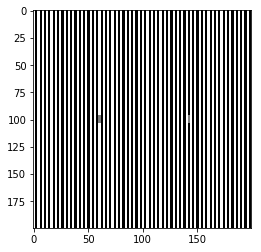

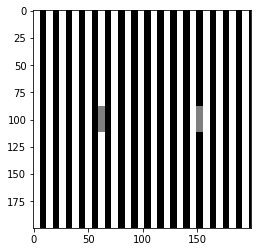

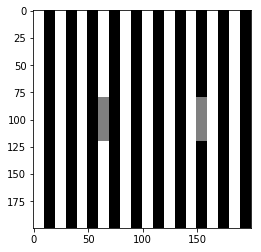

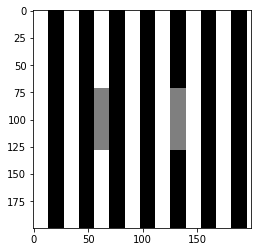

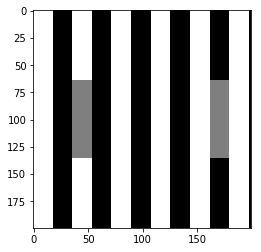

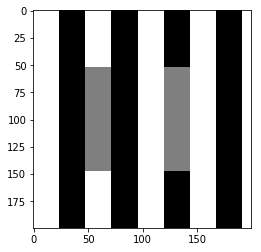

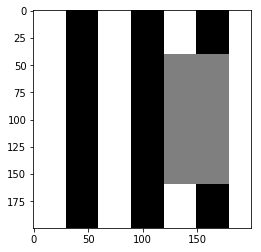

In [70]:
# Define colors
colors = np.zeros((3,3))
colors[0,0] = colors[0,1] = colors[0,2] = 1
colors[1,0] = colors[1,1] = colors[1,2] = 0
colors[2,0] = colors[2,1] = colors[2,2] = 0.5

# frequency
sparialFreq = [0.01,0.03,0.05,0.07,0.09,0.12,0.15]
outputSize=200 # size

for i in range(len(sparialFreq)):
    
    
    if (i != 3) and (i != 5):
    
        firstTarget = 0.3
        secondTarget = 0.7
    else:
        firstTarget = 0.23
        secondTarget = 0.6
        

    whiteSample = generateWhite(outputSize, 0.1
        ,sparialFreq[i],colors,firstTarget,secondTarget)

    #    
    #    data[cont,:,:,:] = generate_white_illussionSym.generateWhiteSimetric(outputSize, 0.1
    #    ,sparialFreq[i],colors)

    plt.imshow(whiteSample)
    plt.show()

    cv2.imwrite('/home/alexander/Desktop/JNP_italians/1_algorithm/illusions/white/white'+str(sparialFreq[i])+'.png',whiteSample*255)


## Chevreul

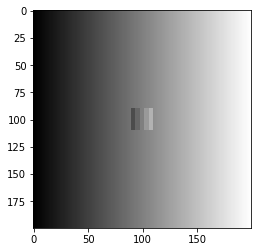

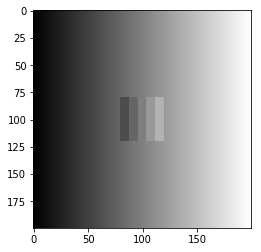

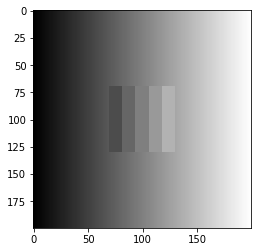

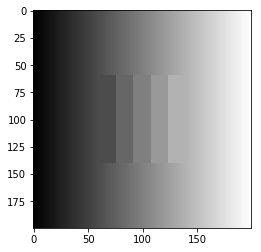

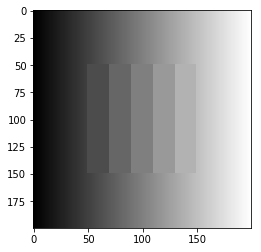

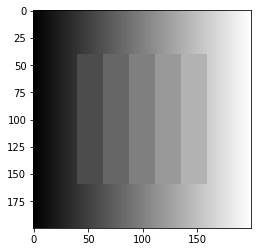

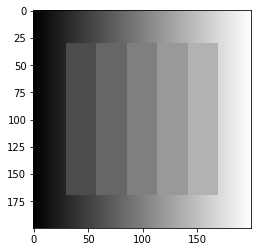

In [72]:
heightC = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]

colors[0,0] = colors[0,1] = colors[0,2] = 0
colors[1,0] = colors[1,1] = colors[1,2] = 0
colors[2,0] = colors[2,1] = colors[2,2] = 0  

for i in range(len(heightC)):

    chevreul = generate_Chevreul.generateChevreul(outputSize,heightC[i]
    ,0.3,5,False, colors)           
     
    plt.imshow(chevreul)
    plt.show()

    cv2.imwrite('/home/alexander/Desktop/JNP_italians/1_algorithm/illusions/Chevreul/chevreul'+str(sparialFreq[i])+'.png',chevreul*255)




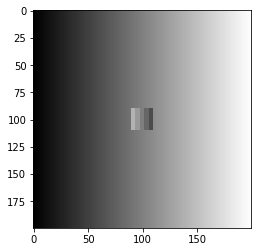

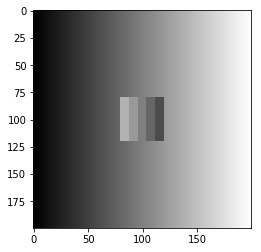

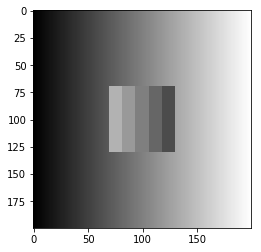

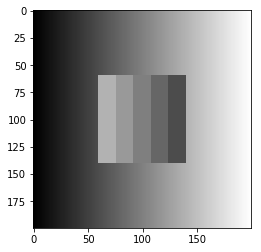

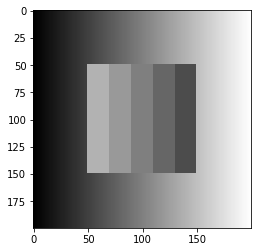

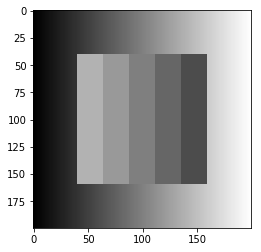

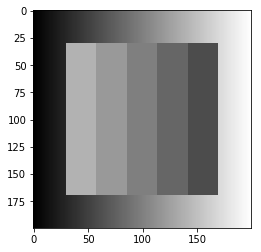

In [73]:
for i in range(len(heightC)):

    chevreul = generate_Chevreul.generateChevreul(outputSize,heightC[i]
    ,0.3,5,True, colors)           
     
    plt.imshow(chevreul)
    plt.show()

    cv2.imwrite('/home/alexander/Desktop/JNP_italians/1_algorithm/illusions/ChevreulCan/chevreulCan'+str(sparialFreq[i])+'.png',chevreul*255)



## Brightness contrast

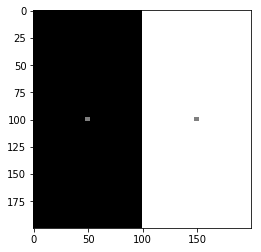

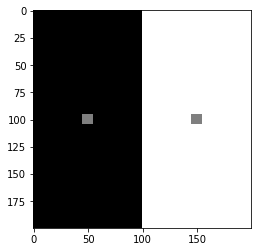

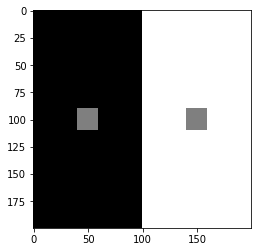

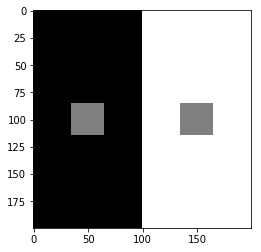

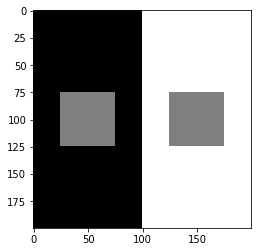

In [84]:
colors[0,0] = colors[0,1] = colors[0,2] = 0
colors[1,0] = colors[1,1] = colors[1,2] = 1
colors[2,0] = colors[2,1] = colors[2,2] = 0.5  
heightC = [5,10,20,30,50]


for i in range(len(heightC)):

    brightness = generate_brightnessContrast.generateBrightnessContrast(outputSize, heightC[i], colors)        
     
    plt.imshow(brightness)
    plt.show()

    cv2.imwrite('/home/alexander/Desktop/JNP_italians/1_algorithm/illusions/brightness/brightness'+str(sparialFreq[i])+'.png',brightness*255)



## Todorovic effect

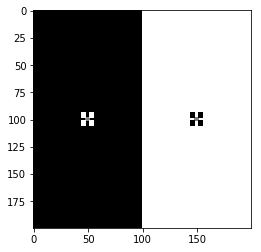

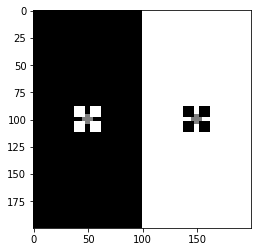

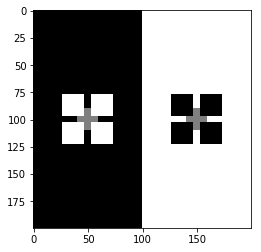

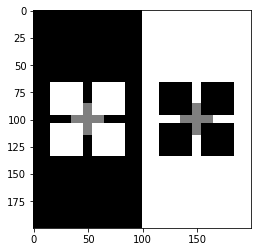

In [137]:
colors[0,0] = colors[0,1] = colors[0,2] = 0
colors[1,0] = colors[1,1] = colors[1,2] = 1
colors[2,0] = colors[2,1] = colors[2,2] = 0.5  
heightC = [5,10,20,30]
factor = 0.15


for i in range(len(heightC)):

    brightness = generate_Todorovic.generateTodorovic(outputSize, heightC[i],factor, colors)        
     
    plt.imshow(brightness)
    plt.show()

    cv2.imwrite('/home/alexander/Desktop/JNP_italians/2_data/Illusions/todorovic/todorovic'+str(sparialFreq[i])+'.png',brightness*255)



## Checkerboard

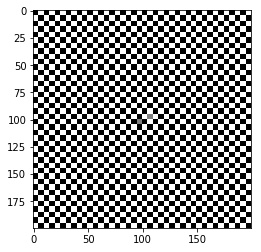

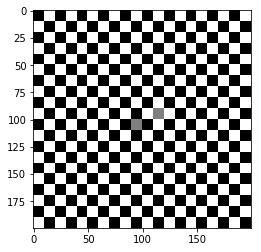

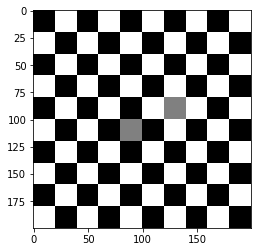

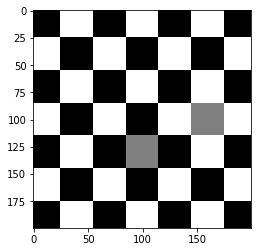

In [138]:
colors[0,0] = colors[0,1] = colors[0,2] = 0
colors[1,0] = colors[1,1] = colors[1,2] = 1
colors[2,0] = colors[2,1] = colors[2,2] = 0.5  
heightC = [5,10,20,30]

for i in range(len(heightC)):

    checkerboard = generate_checkerboard.generate_checkerboard(heightC[i],outputSize)
    
    cv2.imwrite('/home/alexander/Desktop/JNP_italians/2_data/Illusions/checkerboard/checkerboard'+str(sparialFreq[i])+'.png',checkerboard*255)

     
    plt.imshow(checkerboard,cmap='gray')
    plt.show()

## Caffe Wall

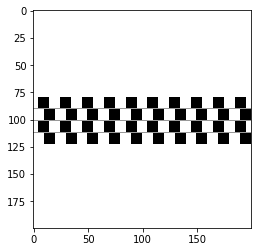

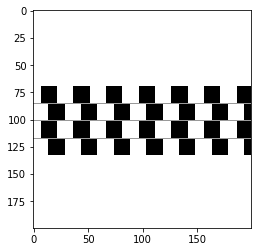

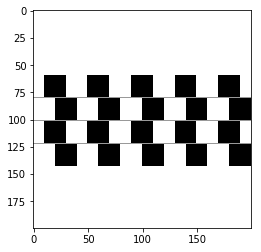

In [2]:
import generateCaffeWall
squareSize = [10,15,20]
rows = 4

for i in range(len(squareSize)):

  
    
    caffeWall = generateCaffeWall.generateCaffeWall(np.ones((200,200)),thickLine=1,squareSize=squareSize[i],rows=rows)
    
    cv2.imwrite('/home/alexander/Desktop/JNP_italians/2_data/Illusions/caffeWall/caffeWall'+str(squareSize[i])+'.png',caffeWall*255)

     
    plt.imshow(caffeWall,cmap='gray')
    plt.show()

## Grating

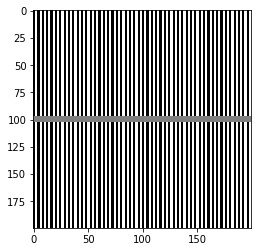

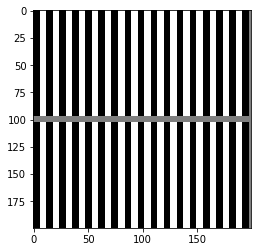

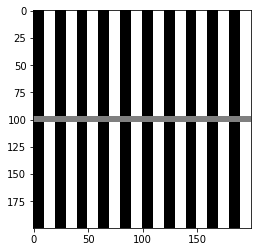

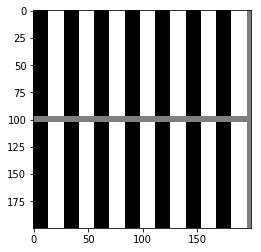

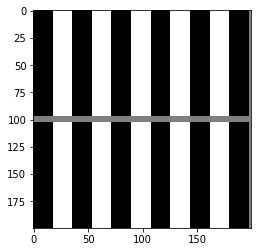

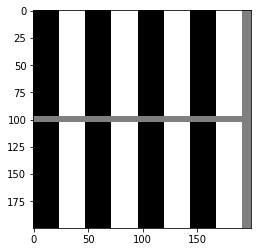

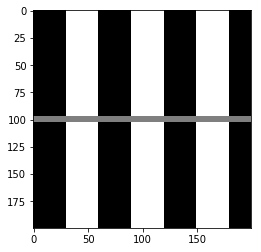

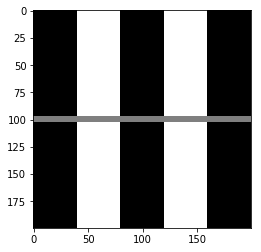

In [12]:
import generate_grating_induction
colors = np.zeros((3,3))
colors[0,0] = colors[0,1] = colors[0,2] = 0
colors[1,0] = colors[1,1] = colors[1,2] = 1
colors[2,0] = colors[2,1] = colors[2,2] = 0.5  
heightC = 0.03
sparialFreq = [0.01,0.03,0.05,0.07,0.09,0.12,0.15,0.2]
outputSize = 200

for i in range(len(sparialFreq)):

    grating = generate_grating_induction.generateGratingInduction(outputSize, heightC, sparialFreq[i], colors)
    
    cv2.imwrite('/home/alexander/Desktop/JNP_italians/2_data/Illusions/grating/grating'+str(sparialFreq[i])+'.png',grating*255)

     
    plt.imshow(grating,cmap='gray')
    plt.show()

## Rotated Grading

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


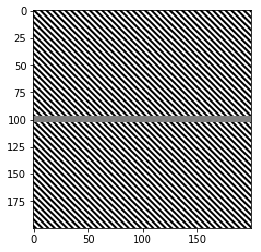

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


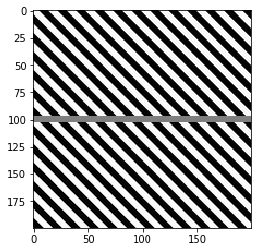

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


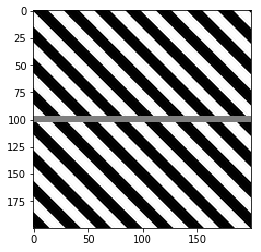

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


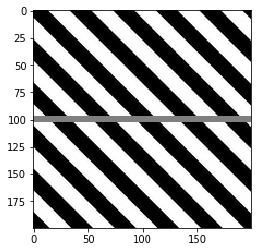

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


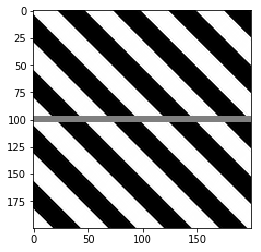

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


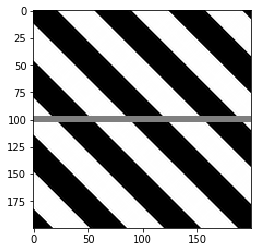

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


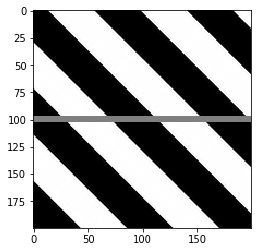

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


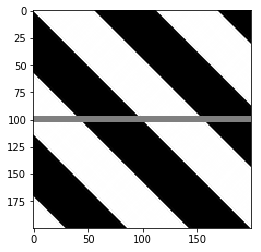

In [13]:
import generateGratingInductionRot
colors = np.zeros((3,3))
colors[0,0] = colors[0,1] = colors[0,2] = 0
colors[1,0] = colors[1,1] = colors[1,2] = 1
colors[2,0] = colors[2,1] = colors[2,2] = 0.5  
heightC = 0.03
sparialFreq = [0.01,0.03,0.05,0.07,0.09,0.12,0.15,0.2]
outputSize = 200

for i in range(len(sparialFreq)):

    grating = generateGratingInductionRot.generateGratingInductionRot(outputSize, heightC, sparialFreq[i], colors,45)
    
    cv2.imwrite('/home/alexander/Desktop/JNP_italians/2_data/Illusions/gratingRot/grating'+str(sparialFreq[i])+'.png',grating*255)

     
    plt.imshow(grating,cmap='gray')
    plt.show()

## Poggendorff

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


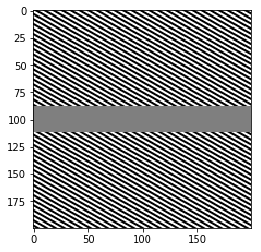

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


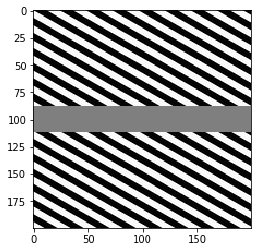

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


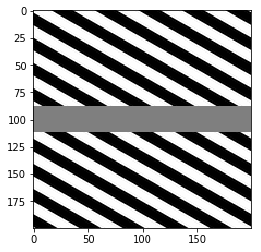

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


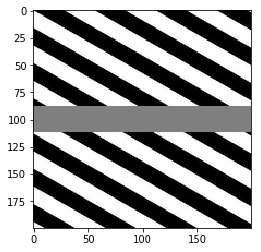

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


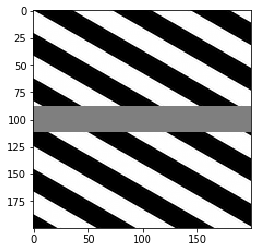

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


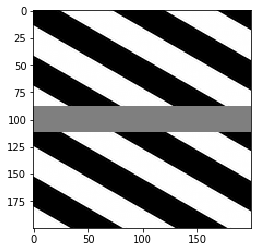

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


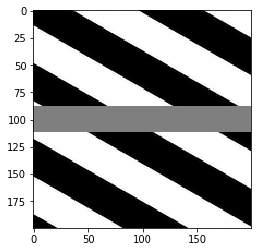

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


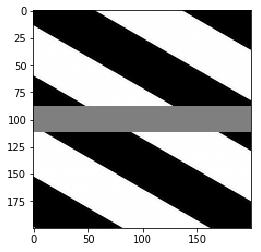

In [17]:
import generateGratingInductionRot
colors = np.zeros((3,3))
colors[0,0] = colors[0,1] = colors[0,2] = 0
colors[1,0] = colors[1,1] = colors[1,2] = 1
colors[2,0] = colors[2,1] = colors[2,2] = 0.5  
heightC = 0.12
sparialFreq = [0.01,0.03,0.05,0.07,0.09,0.12,0.15,0.2]
outputSize = 200

for i in range(len(sparialFreq)):

    grating = generateGratingInductionRot.generateGratingInductionRot(outputSize, heightC, sparialFreq[i], colors,60)
    
    cv2.imwrite('/home/alexander/Desktop/JNP_italians/2_data/Illusions/poggendorff/grating'+str(sparialFreq[i])+'.png',grating*255)

     
    plt.imshow(grating,cmap='gray')
    plt.show()

## Plot white results

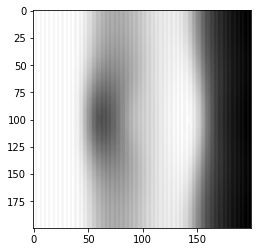

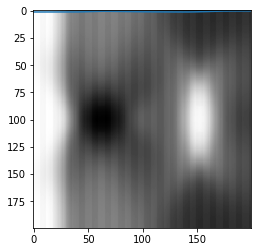

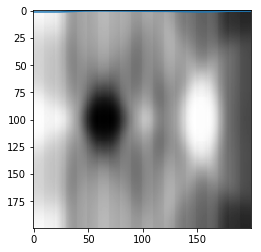

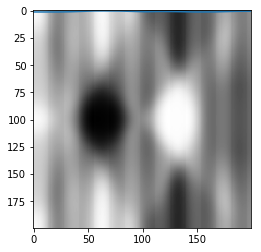

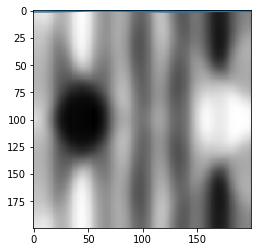

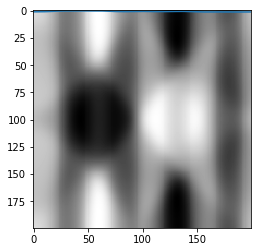

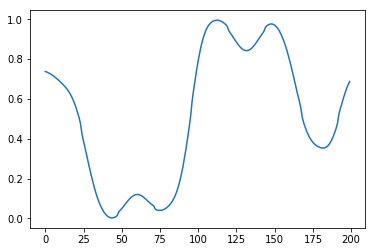

In [30]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/WC_cortical/white/'
images = ["white0.01.png","white0.03.png","white0.05.png","white0.07.png","white0.09.png","white0.12.png"]

for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    plt.imshow(img,cmap='gray')
    plt.show()
    
    plt.plot(img[100,:])
    


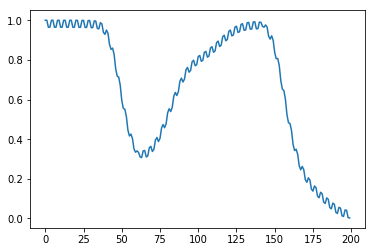

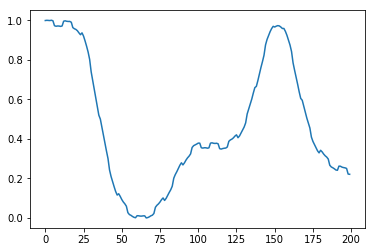

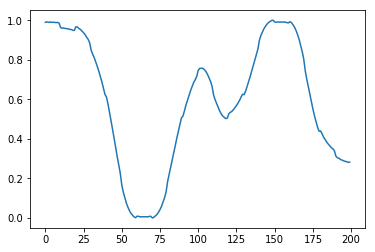

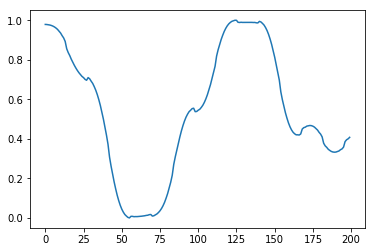

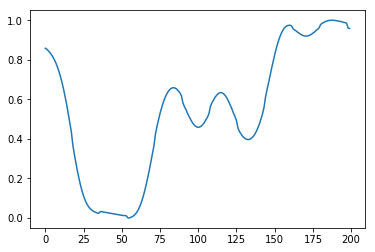

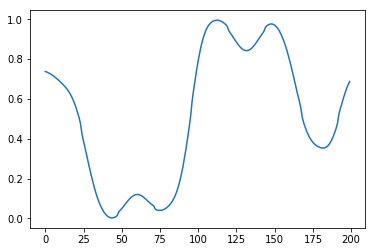

In [31]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/WC_cortical/white/'
images = ["white0.01.png","white0.03.png","white0.05.png","white0.07.png","white0.09.png","white0.12.png"]

for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    
    plt.plot(img[100,:])
    plt.show()
    
    
    

## Plot chevreul

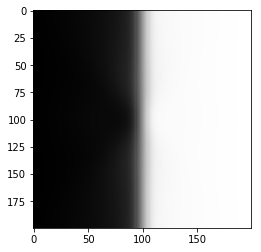

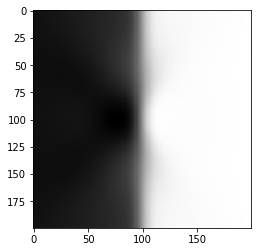

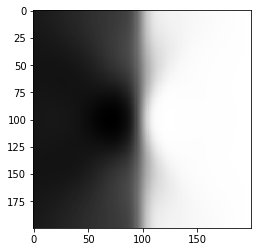

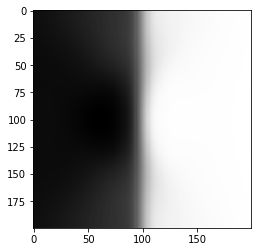

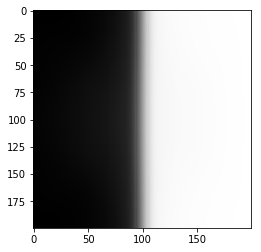

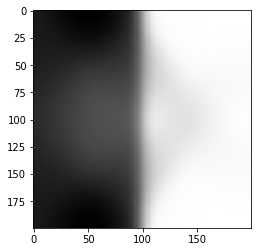

In [35]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/WC_cortical/chevreul/'
images = ["chevreul0.01.png","chevreul0.03.png","chevreul0.05.png","chevreul0.07.png","chevreul0.09.png","chevreul0.12.png"]
for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    plt.imshow(img,cmap='gray')
    plt.show()
    


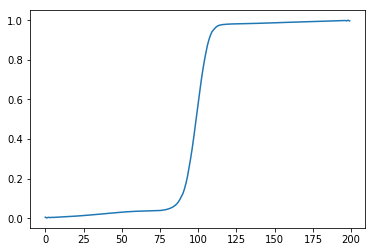

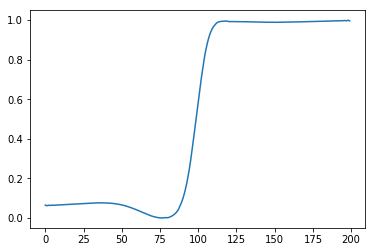

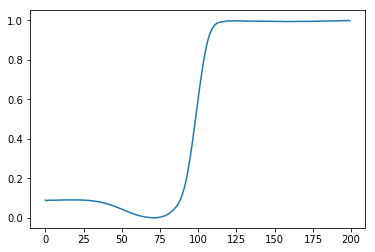

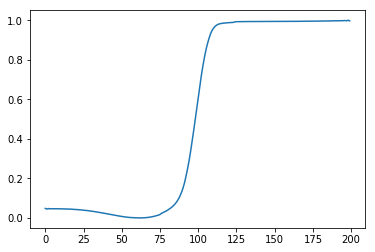

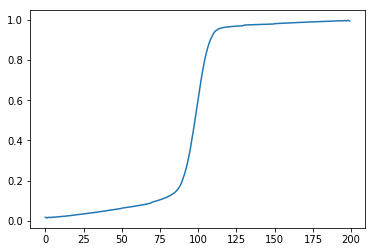

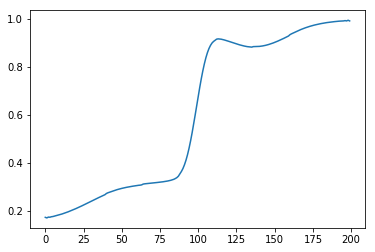

In [36]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/WC_cortical/chevreul/'
images = ["chevreul0.01.png","chevreul0.03.png","chevreul0.05.png","chevreul0.07.png","chevreul0.09.png","chevreul0.12.png"]
savePath = '/home/alexander/Desktop/JNP_italians/3_Results/figures/'

for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    
    plt.plot(img[100,:])
    plt.savefig(savePath+images[i]+'.svg')
    plt.show()
    

## Cancellation chevreul

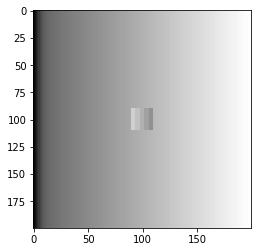

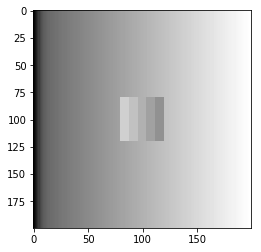

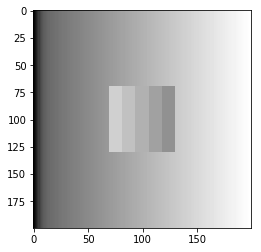

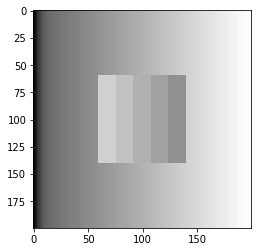

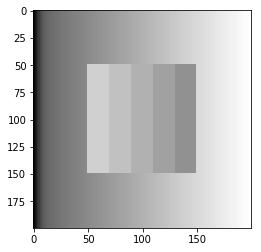

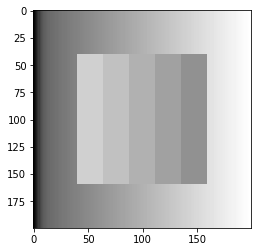

In [56]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/WC_planar/chevreulCan/'
images = ["chevreulCan0.01.png","chevreulCan0.03.png","chevreulCan0.05.png","chevreulCan0.07.png","chevreulCan0.09.png","chevreulCan0.12.png"]
for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    plt.imshow(img,cmap='gray')
    plt.savefig(savePath+images[i]+'.svg')
    plt.show()
    

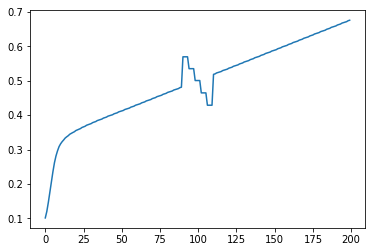

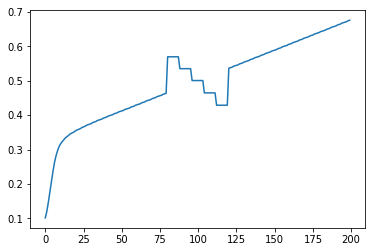

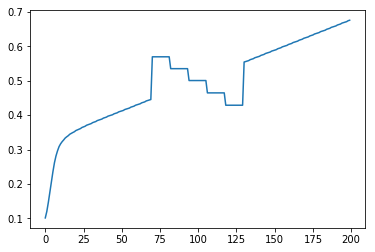

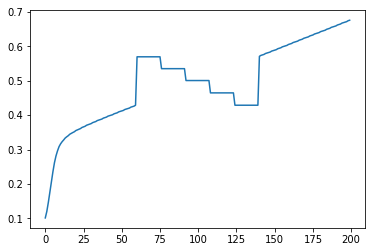

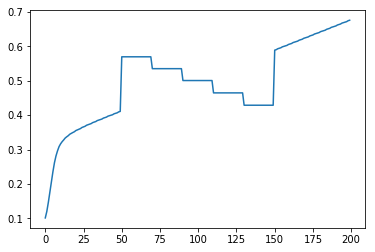

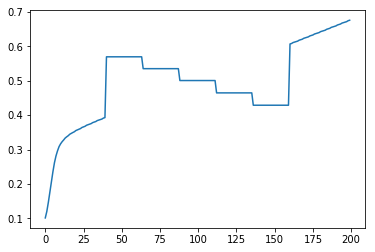

In [57]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/WC_planar/chevreulCan/'
images = ["chevreulCan0.01.png","chevreulCan0.03.png","chevreulCan0.05.png","chevreulCan0.07.png","chevreulCan0.09.png","chevreulCan0.12.png"]

for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    
    plt.plot(img[100,:])
    plt.savefig(savePath+images[i]+'.svg')
    plt.show()

## Brightness contrast

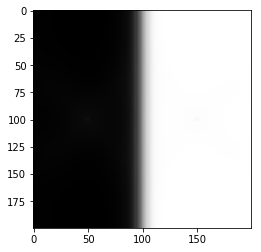

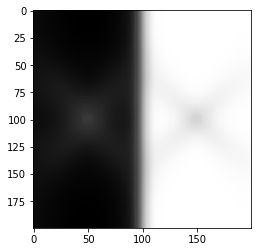

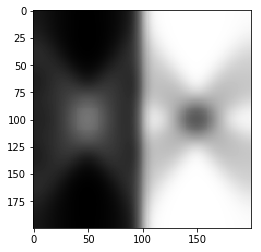

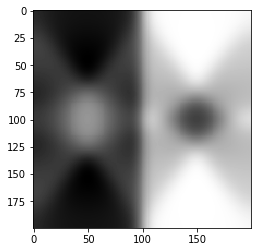

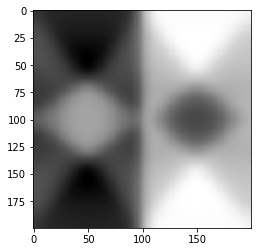

In [41]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/WC_cortical/brightness/'
images = ["brightness0.01.png","brightness0.03.png","brightness0.05.png","brightness0.07.png","brightness0.09.png"]
for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    plt.imshow(img,cmap='gray')
    plt.show()
    

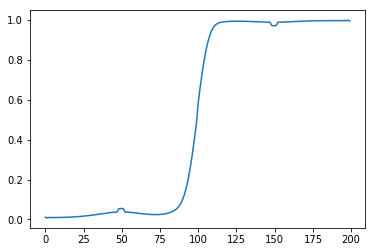

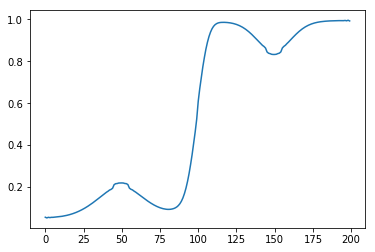

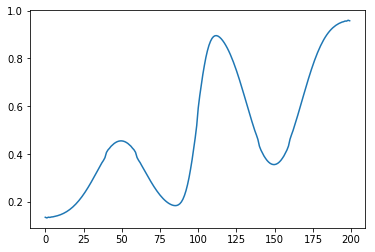

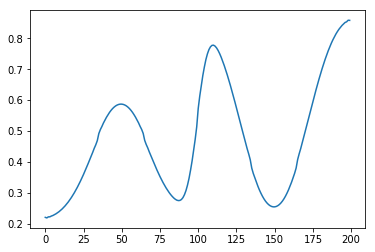

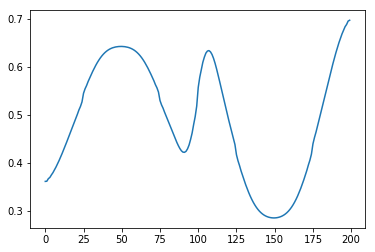

In [42]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/WC_cortical/brightness/'
images = ["brightness0.01.png","brightness0.03.png","brightness0.05.png","brightness0.07.png","brightness0.09.png"]

for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    
    plt.plot(img[100,:])
    plt.show()

## Plot Todorovic

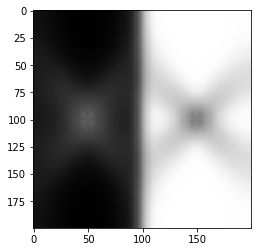

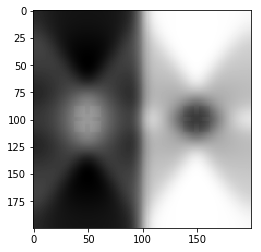

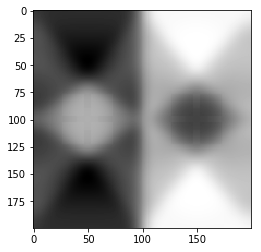

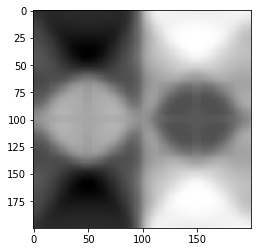

In [46]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/WC_cortical/todorovic/'
images = ["todorovic0.01.png","todorovic0.03.png","todorovic0.05.png","todorovic0.07.png"]
for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    plt.imshow(img,cmap='gray')
    plt.show()

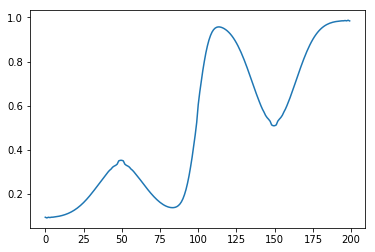

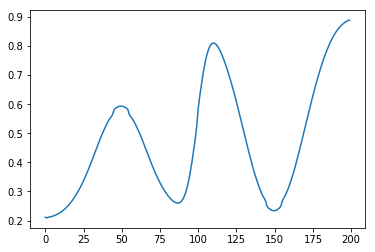

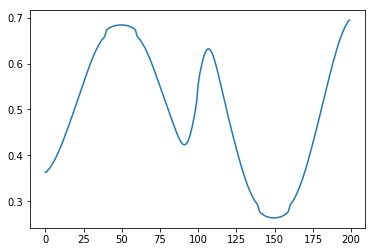

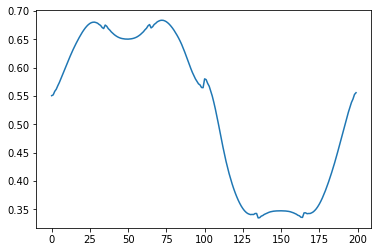

In [47]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/WC_cortical/todorovic/'
images = ["todorovic0.01.png","todorovic0.03.png","todorovic0.05.png","todorovic0.07.png"]

for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    
    plt.plot(img[100,:])
    plt.show()

## Plot Checkerboard

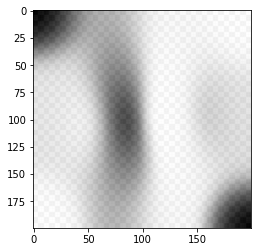

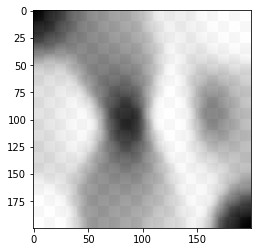

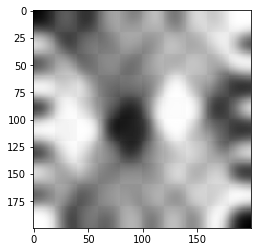

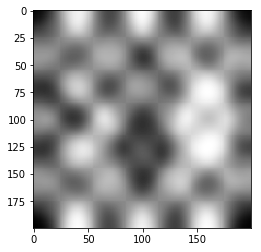

In [52]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/WC_cortical/checkerboard/'
images = ["checkerboard0.01.png","checkerboard0.03.png","checkerboard0.05.png","checkerboard0.07.png"]
for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    plt.imshow(img,cmap='gray')
    plt.show()

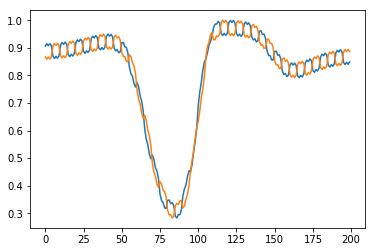

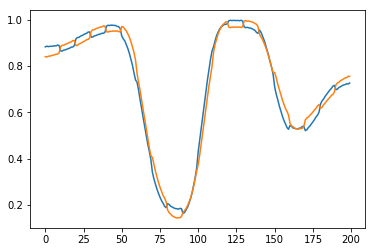

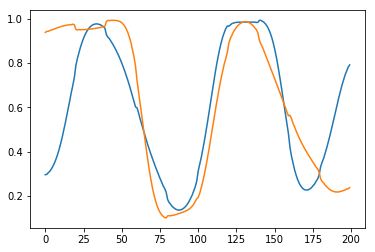

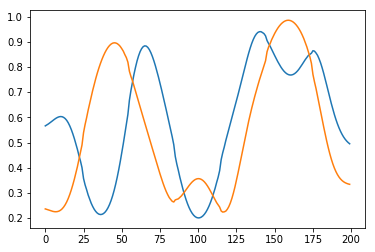

In [51]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/WC_cortical/checkerboard/'
images = ["checkerboard0.01.png","checkerboard0.03.png","checkerboard0.05.png","checkerboard0.07.png"]
pos = [[98,103],[95,105],[91,110],[100,131]]

for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    
    plt.plot(img[pos[i][0],:])
    plt.plot(img[pos[i][1],:])
    plt.show()

## Plot Caffe wall

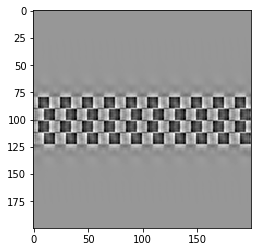

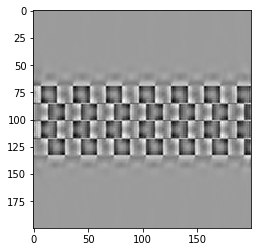

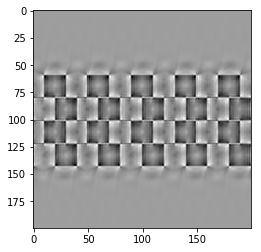

In [6]:
path = '/home/alexander/Desktop/JNP_italians/3_Results/'
images = ["caffeWall10.png","caffeWall15.png","caffeWall20.png"]
for i in range(len(images)):
    
    f = h5py.File(path+images[i]+'.jld', "r")
    img = f["data"].value.astype(float).T
    
    plt.imshow(img,cmap='gray')
    plt.show()